In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
from skimage.morphology import erosion, disk, square, closing
from skimage.filters import prewitt
import math
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from skimage import color, io, measure, segmentation, img_as_ubyte
from skimage.util import img_as_float, img_as_uint
from skimage.filters import threshold_otsu
from skimage.filters import gaussian
from skimage.color import label2rgb
from scipy.spatial import distance
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import matrix_transform
from skimage import io, color, morphology
import glob
from sklearn.decomposition import PCA
from sklearn import decomposition
#import LDA as LDA
import os
import scipy.io as sio
DATA_PATH = '../data_test/Donald/'

In [3]:
landmarks_fixed = sio.loadmat(DATA_PATH + 'donaldfixedPoints.mat')
landmarks_moving = sio.loadmat(DATA_PATH + 'donaldmovingPoints.mat')



dict_keys(['__header__', '__version__', '__globals__', 'movingPoints'])

In [30]:
src_img = io.imread(DATA_PATH + 'donald_2.png')
print(src_img[300, 300])

[84 69 44]


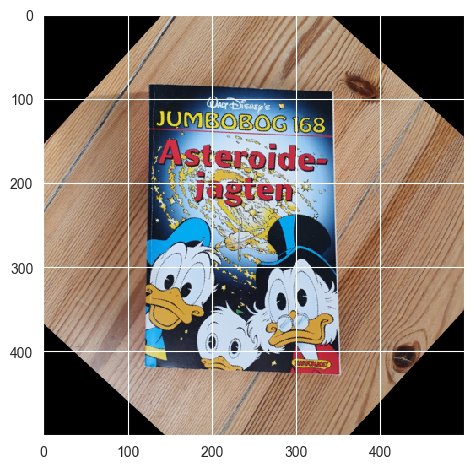

In [29]:
tform = EuclideanTransform()
tform.estimate(landmarks_moving['movingPoints'], landmarks_fixed['fixedPoints'])

src_transform = matrix_transform(landmarks_fixed['fixedPoints'], tform.params)
new_img = warp(src_img, tform.inverse, clip = True)
#new_img = img_as_uint(new_img)
print(new_img[300, 300])
io.imshow(new_img)

In [4]:
landmarks_fixed = sio.loadmat(DATA_PATH + 'donaldfixedPoints.mat')['fixedPoints']
landmarks_moving = sio.loadmat(DATA_PATH + 'donaldmovingPoints.mat')['movingPoints']

In [6]:
first_landmark = np.mean(landmarks_fixed, axis = 0)
second_landmark = np.mean(landmarks_moving, axis = 0)

In [9]:
((first_landmark[1] - second_landmark[1])**2 + (first_landmark[0] - second_landmark[0])**2)**(1/2)

6.4113001682773065